In [1]:
import sys
import os
from dotenv import load_dotenv
import psycopg2
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
load_dotenv()
user = os.environ['DB_USER']
password = os.environ['DB_PASS']
host = os.environ['DB_HOST']
port = os.environ['DB_PORT']
database = os.environ['DB_NAME']

In [6]:
def connect():
    conn = None
    try:
        print('Connecting..')
        conn = psycopg2.connect(
              host=host,
              database=database,
              user=user,
              password=password
        )
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        sys.exit(1)   
        
    print("All good, Connection successful!")
    return conn

def sql_to_dataframe(conn, query):
    """Import data from a PostgreSQL database using a SELECT query"""
    cursor = conn.cursor()   
    try:
        cursor.execute(query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    # The execute returns a list of tuples:   
    tuples_list = cursor.fetchall()   
    
    # Now we need to transform the list into a pandas DataFrame:   
    df = pd.DataFrame(tuples_list, columns=[col[0] for col in cursor.description])
    cursor.close()   
    return df

In [7]:
query = """ SELECT * FROM xdr_data"""


conn = connect()
df = sql_to_dataframe(conn, query)
conn.close()

df.head(10)

Connecting..
All good, Connection successful!


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
5,1.311448e+19,4/12/2019 21:37,439.0,4/25/2019 8:08,553.0,1074638.0,2.082014e+14,3.366819e+10,3.529841e+13,T89132C,...,21332918.0,2611113.0,7345361.0,6536448.0,710293538.0,13167974.0,654978277.0,4436057.0,30307754.0,754452212.0
6,1.311448e+19,4/13/2019 8:41,612.0,4/25/2019 8:16,168.0,1035261.0,2.082014e+14,3.366537e+10,8.676270e+13,9.16456701058919E+015,...,7234465.0,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0
7,1.304243e+19,4/14/2019 2:11,592.0,4/25/2019 2:26,512.0,951292.0,2.082010e+14,3.376349e+10,8.654640e+13,CELL_208_20_520025_1,...,12189786.0,19735183.0,6858496.0,12075206.0,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0
8,1.311448e+19,4/14/2019 12:48,121.0,4/25/2019 10:22,960.0,941634.0,2.082014e+14,3.369874e+10,3.556241e+13,T42084A,...,18436641.0,10860867.0,10587264.0,8467177.0,821671285.0,6548349.0,172920486.0,14749031.0,42363146.0,861612261.0
9,1.304243e+19,4/15/2019 0:32,0.0,4/25/2019 0:40,284.0,864482.0,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,...,16338345.0,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0


In [8]:
def data_from_postgres(query):
    uri = f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}"
    try:
        alchemyEngine = create_engine(uri)
        
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        sys.exit(1)
    print("Engine created!")        
    try:
        dbConnection = alchemyEngine.connect()
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        sys.exit(1)

    print("Connection established")
    df = pd.read_sql(query, dbConnection)
    dbConnection.close()

    return df

In [9]:
query = """ SELECT * FROM xdr_data"""
df = data_from_postgres(query)
df.head(10)

Engine created!
Connection established


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
5,1.311448e+19,4/12/2019 21:37,439.0,4/25/2019 8:08,553.0,1074638.0,2.082014e+14,3.366819e+10,3.529841e+13,T89132C,...,21332918.0,2611113.0,7345361.0,6536448.0,710293538.0,13167974.0,654978277.0,4436057.0,30307754.0,754452212.0
6,1.311448e+19,4/13/2019 8:41,612.0,4/25/2019 8:16,168.0,1035261.0,2.082014e+14,3.366537e+10,8.676270e+13,9.16456701058919E+015,...,7234465.0,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0
7,1.304243e+19,4/14/2019 2:11,592.0,4/25/2019 2:26,512.0,951292.0,2.082010e+14,3.376349e+10,8.654640e+13,CELL_208_20_520025_1,...,12189786.0,19735183.0,6858496.0,12075206.0,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0
8,1.311448e+19,4/14/2019 12:48,121.0,4/25/2019 10:22,960.0,941634.0,2.082014e+14,3.369874e+10,3.556241e+13,T42084A,...,18436641.0,10860867.0,10587264.0,8467177.0,821671285.0,6548349.0,172920486.0,14749031.0,42363146.0,861612261.0
9,1.304243e+19,4/15/2019 0:32,0.0,4/25/2019 0:40,284.0,864482.0,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,...,16338345.0,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [11]:
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

In [12]:
top10_handsets = df['Handset Type'].value_counts()
top10_handsets = top10_handsets.sort_values(ascending=False).head(10)
print("Top 10 Handsets:")
top10_handsets

Top 10 Handsets:


Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

In [13]:
df['Manufacturer'] = df['Handset Type'].str.split().str[0]
top3_manufacturers = df['Manufacturer'].value_counts().sort_values(ascending=False).head(3)
print("Top 3 Handset Manufacturers:")
top3_manufacturers

Top 3 Handset Manufacturers:


Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64

In [14]:
# Filter data by top 3 manufacturers
top_3_manufacturer_data = df[df['Manufacturer'].isin(top3_manufacturers.index)]
top_5_handsets_per_manufacturer = top_3_manufacturer_data.groupby(['Manufacturer', 'Handset Type']).size().groupby('Manufacturer').nlargest(5).reset_index(level=0, drop=True)
print("Top 5 Handsets per Top 3 Handset Manufacturers:")
top_5_handsets_per_manufacturer

Top 5 Handsets per Top 3 Handset Manufacturers:


Manufacturer  Handset Type                  
Apple         Apple iPhone 6S (A1688)            9419
              Apple iPhone 6 (A1586)             9023
              Apple iPhone 7 (A1778)             6326
              Apple iPhone Se (A1723)            5187
              Apple iPhone 8 (A1905)             4993
Huawei        Huawei B528S-23A                  19752
              Huawei E5180                       2079
              Huawei P20 Lite Huawei Nova 3E     2021
              Huawei P20                         1480
              Huawei Y6 2018                      997
Samsung       Samsung Galaxy S8 (Sm-G950F)       4520
              Samsung Galaxy A5 Sm-A520F         3724
              Samsung Galaxy J5 (Sm-J530)        3696
              Samsung Galaxy J3 (Sm-J330)        3484
              Samsung Galaxy S7 (Sm-G930X)       3199
dtype: int64

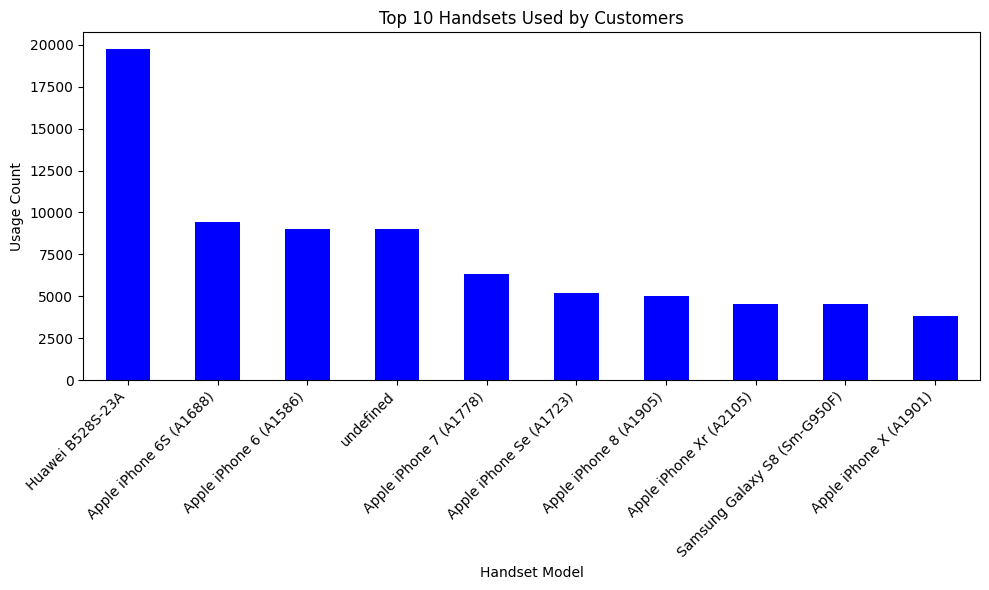

In [20]:
plt.figure(figsize=(10, 6))
top10_handsets.plot(kind='bar', color='blue')
plt.title('Top 10 Handsets Used by Customers')
plt.xlabel('Handset Model')
plt.ylabel('Usage Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

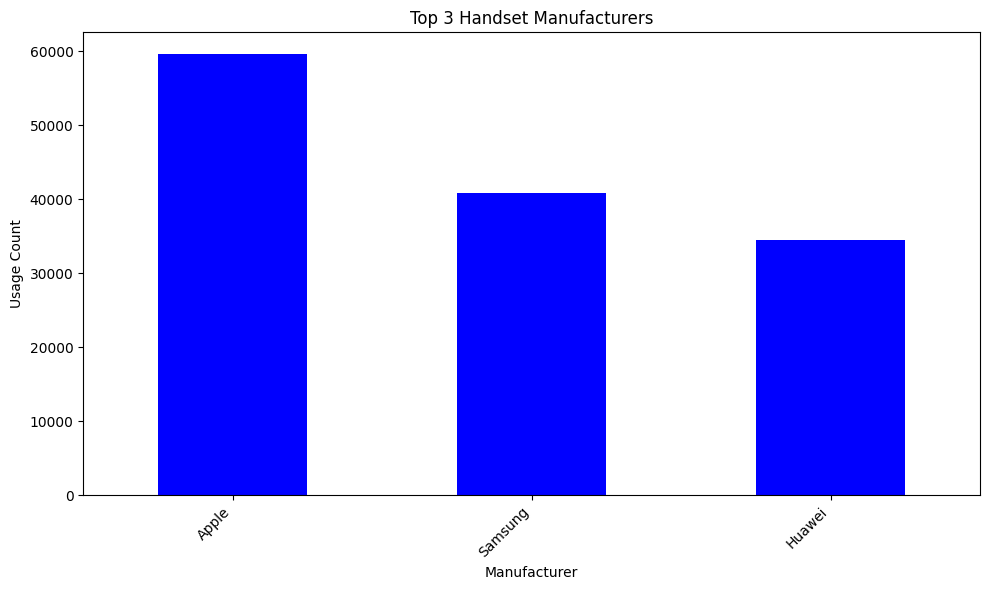

In [21]:
# Create a bar plot for the top 3 handset manufacturers
plt.figure(figsize=(10, 6))
top3_manufacturers.plot(kind='bar', color='blue')
plt.title('Top 3 Handset Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Usage Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

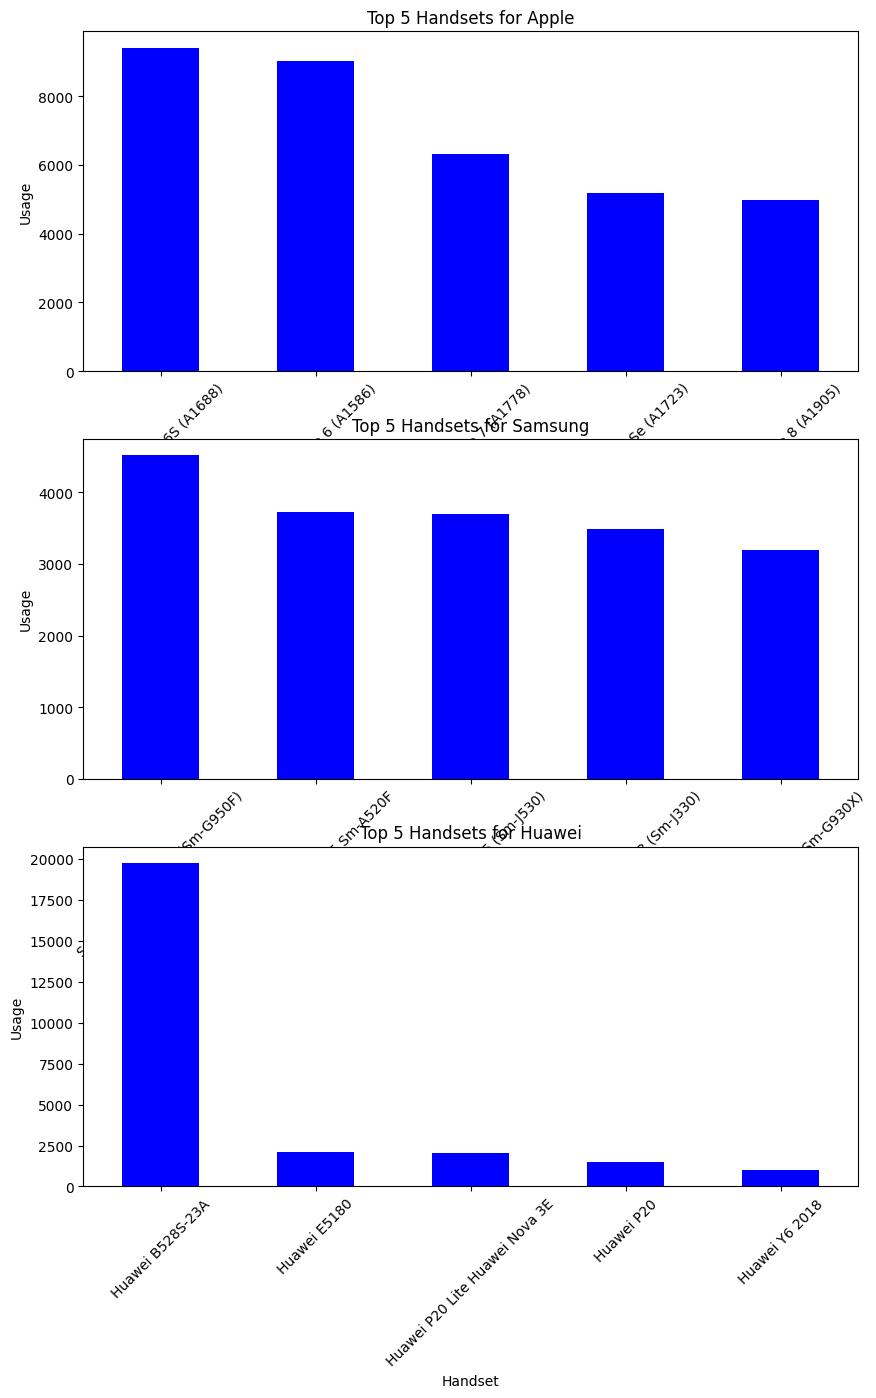

In [19]:
figure, axis = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Iterate over the top 3 manufacturers
for i, manufacturer in enumerate(top3_manufacturers.index):
    manufacturer_data = top_3_manufacturer_data[top_3_manufacturer_data['Manufacturer'] == manufacturer]
    top_5_handsets = manufacturer_data['Handset Type'].value_counts().head(5)
    top_5_handsets.plot(kind='bar', ax=axis[i], color='blue')
    axis[i].set_title(f'Top 5 Handsets for {manufacturer}')
    axis[i].set_xlabel('Handset')
    axis[i].set_ylabel('Usage')
    axis[i].tick_params(axis='x', rotation=45)
plt.show()

In [22]:
#session number and duration
